### This code trains models to classify yoga poses from 2D joint locations
* For each pose
 * Read file for that pose into a dataframe
 * Append a column containing the pose name
* Concat all the dataframes
* Feed these dataframes to a multi-class classifier

In [0]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn


from sklearn import metrics
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.linear_model import LogisticRegression as LR


#Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
%matplotlib inline

In [0]:
colnames = ['r-ankle-x','r-ankle-y','r-ankle-probability',
            'r-knee-x','r-knee-y','r-knee-probability',
            'r-hip-x','r-hip-y','r-hip-probability',
            'l-hip-x','l-hip-y','l-hip-probability',
            'l-knee-x','l-knee-y','l-knee-probability',
            'l-ankle-x','l-ankle-y','l-ankle-probability',
            'r-wrist-x','r-wrist-y','r-wrist-probability',
            'r-elbow-x','r-elbow-y','r-elbow-probability',
            'r-shoulder-x','r-shoulder-y','e-shoulder-probability',
            'l-shoulder-x','l-shoulder-y','l-shoulder-probability',
            'l-elbow-x','l-elbow-y','l-elbow-probability',
            'l-wrist-x','l-wrist-y','l-wrist-probability',
            'upper-neck-x','upper-neck-y','upper-neck-probability',
            'head-top-x','head-top-y','head-top-probability',
            'dir']
dfs = []
for pose in ['Salamba_sarvangasana',
             'Salamba_sirsasana',
             'Virabhadrasana_I',
             'Virabhadrasana_II',
             'Virabhadrasana_III']:
    pose_fname = '~/proj/capstone/csvs/' +  pose + '_cleaned_normed.csv'
    #print(pose_fname)
    df = pd.read_csv(pose_fname)
    df.columns = colnames #Need to do this until csv columns are fixed
    df['pose'] = pose
    dfs.append(df)

In [0]:
pose_data = pd.concat(dfs)

In [0]:
pose_data.drop(['dir'], inplace=True, axis=1)
pose_data.head()

,r-ankle-x,r-ankle-y,r-ankle-probability,r-knee-x,r-knee-y,r-knee-probability,r-hip-x,r-hip-y,r-hip-probability,l-hip-x,...,l-wrist-x,l-wrist-y,l-wrist-probability,upper-neck-x,upper-neck-y,upper-neck-probability,head-top-x,head-top-y,head-top-probability,pose
0,87.448559,217.838369,0.505847,80.968416,142.251459,0.511442,105.814777,187.885152,0.081719,105.929175,...,77.551415,95.958741,0.100272,109.186132,212.961181,0.000813,154.427908,8.461689,0.002315,Salamba_sarvangasana
1,59.252584,183.631370,0.497935,128.316622,98.371321,0.499944,129.118520,164.946589,0.450965,118.885073,...,129.378793,40.260139,0.124809,59.536454,187.306491,0.000427,122.896023,27.900073,0.002322,Salamba_sarvangasana
2,149.477556,45.255002,0.536366,133.396754,101.265951,0.523882,102.836631,153.024045,0.052453,112.679880,...,159.863639,3.855756,0.019785,107.712774,219.302369,0.019101,145.164575,240.236714,0.003607,Salamba_sarvangasana
3,106.212701,57.847594,0.166920,98.478847,115.896510,0.368246,97.581404,147.027455,0.113062,94.106251,...,104.181257,60.110479,0.179631,108.352346,188.404165,0.010480,137.981444,190.529350,0.006909,Salamba_sarvangasana
4,108.778183,102.634995,0.399511,110.901226,150.082236,0.344063,136.106798,194.972200,0.114394,117.706953,...,106.869467,103.692242,0.063143,122.476653,222.116982,0.015763,124.375585,219.470564,0.001834,Salamba_sarvangasana


In [0]:
#df['lat_long'] = df[['lat', 'long']].apply(tuple, axis=1)
#   Angle between two joints
# = angle between three joint locations (knee to ankle, knee to hip)
# = angle between two vectors
# vector is defined as x1,y1 being the common joint, x2,y2 being the adjacent joint

In [0]:
train, test = train_test_split(pose_data, test_size=0.2)
(train.shape, test.shape)

((2655, 43), (664, 43))

### SVM Optimized Model

In [0]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
              {'kernel': ['poly'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]

optimized_svm = GridSearchCV(SVC(), parameters)
svm_model = optimized_svm


In [0]:
optimized_svm.estimator

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
#To avoid running the grid search again
#Optimized
#svm_model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
#  max_iter=-1, probability=True, random_state=None, shrinking=True,
#  tol=0.001, verbose=False)

#Simple
#svm_model = SVC()
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
%time svm_model.fit( train.drop('pose', axis=1), train['pose'] )

CPU times: user 885 ms, sys: 0 ns, total: 885 ms
Wall time: 884 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
predictedTrain = svm_model.predict(X=train.drop('pose', axis=1))
predictedTest  = svm_model.predict(X=test.drop('pose', axis=1))

In [0]:
metrics.accuracy_score(test['pose'], predictedTest)

0.29367469879518071

In [0]:
confmat_train = metrics.confusion_matrix( predictedTrain, train['pose'] )

In [0]:
confmat_test = metrics.confusion_matrix( predictedTest, test['pose'] )

In [0]:
pd.DataFrame(confmat_test)

,0,1,2,3,4
0,84,28,2,2,0
1,16,19,1,1,1
2,6,6,66,26,2
3,1,3,28,144,8
4,9,15,16,16,164


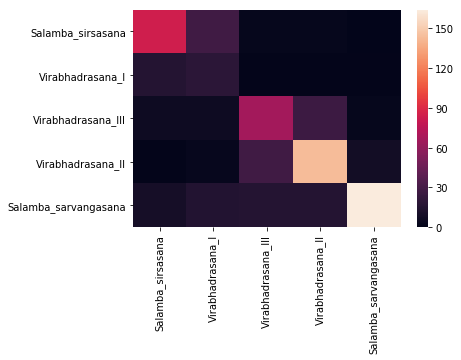

In [0]:
confmat_labels = list(set(train['pose']))
sn.heatmap(pd.DataFrame(confmat_test, confmat_labels, confmat_labels))

### Optimized Random Forest model

In [0]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
parameters = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
                        ,"min_samples_split" :[2,3,4,5,6]
                        ,"n_estimators" : [10, 30, 60, 90]
                        ,"min_samples_leaf": [1,2,3,4,5]
                        ,"max_features": (2,3,4)}

optimized_rf = GridSearchCV(RandomForestClassifier(), parameters)
#optimized_rf = RandomForestClassifier()
rf_model = optimized_rf


In [0]:
optimized_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
#To avoid running the grid search again
#Optimized
#svm_model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
#  max_iter=-1, probability=True, random_state=None, shrinking=True,
#  tol=0.001, verbose=False)

#Simple
#svm_model = SVC()

In [0]:
%time rf_model.fit( train.drop('pose', axis=1), train['pose'] )

CPU times: user 28min 39s, sys: 622 ms, total: 28min 40s
Wall time: 28min 42s


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [10, 30, 60, 90], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_features': (2, 3, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
predictedTrain = rf_model.predict(X=train.drop('pose', axis=1))
predictedTest  = rf_model.predict(X=test.drop('pose', axis=1))

In [0]:
metrics.accuracy_score(test['pose'], predictedTest)

0.74698795180722888

In [0]:
confmat_train = metrics.confusion_matrix( predictedTrain, train['pose'] )

In [0]:
confmat_test = metrics.confusion_matrix( predictedTest, test['pose'] )

In [0]:
pd.DataFrame(confmat_test)

,0,1,2,3,4
0,95,33,6,3,3
1,13,18,7,4,1
2,4,8,65,25,3
3,1,7,28,140,20
4,3,5,7,17,148


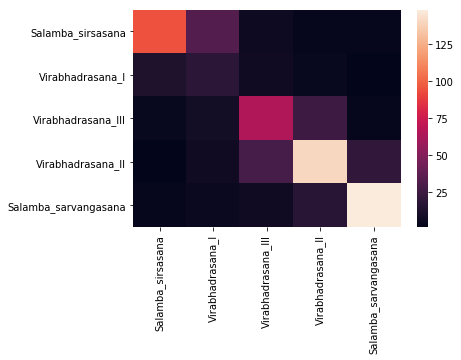

In [0]:
confmat_labels = list(set(train['pose']))
sn.heatmap(pd.DataFrame(confmat_test, confmat_labels, confmat_labels))

In [0]:
logr = LR(multi_class='ovr')
logr.fit( train.drop('pose', axis=1), train['pose'] )
results = logr.predict( test.drop('pose', axis=1))

In [0]:
logr.score( test.drop('pose', axis=1), test['pose'] )

0.63253012048192769

In [0]:
labels = list(set(test.pose))
labels.sort()
labels

['Salamba_sarvangasana',
 'Salamba_sirsasana',
 'Virabhadrasana_I',
 'Virabhadrasana_II',
 'Virabhadrasana_III']

In [0]:
confmat = metrics.confusion_matrix(test['pose'], results)
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
confmat_normed = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis] #normalize
confmat

array([[ 98,   7,   6,   0,   5],
       [ 32,  11,   7,   7,  14],
       [  6,   2,  44,  33,  28],
       [  3,   2,  24, 134,  26],
       [  5,   3,  11,  23, 133]])

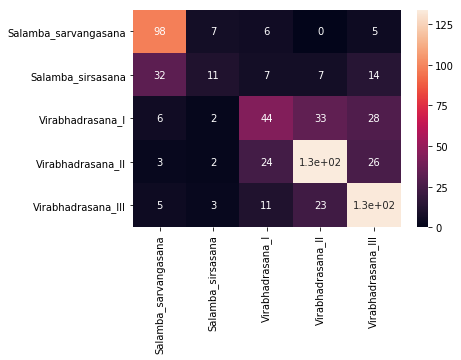

In [0]:
sn.heatmap(pd.DataFrame(confmat, labels, labels), annot=True)

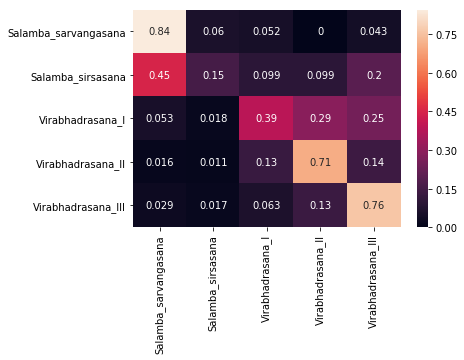

In [0]:
sn.heatmap(pd.DataFrame(confmat_normed, labels, labels), annot=True)

### Compare lots of classifiers

In [0]:
def run_classifier(train, test, classifier_class):
    startt = time.time()
    classifier_class.fit( train.drop('pose', axis=1), train['pose'] )
    
    probas = classifier_class.predict_proba(test.drop('pose', axis=1))    
    results = classifier_class.predict( test.drop('pose', axis=1))
    log_loss = metrics.log_loss(test['pose'], probas)
    score = log_loss
    #score = classifier_class.score( test, test_labels )
    
    
    results = classifier_class.predict( test.drop('pose', axis=1))
    #score = classifier_class.score( test.drop('pose', axis=1), test['pose'] )
    confmat = metrics.confusion_matrix(test['pose'], results)
    confmat = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis] #normalize
    duration = time.time() - startt
    return (type(classifier_class).__name__, score, duration, confmat)

In [0]:
# Taken from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LR(multi_class='ovr')]

In [0]:
#[(name, score, duration,confmat),(...),...]
%time classifier_rslt_all = [run_classifier(train, test, classifier) for classifier in classifiers]

classifier_names = [e[0] for e in classifier_rslt_all]
confmats = [e[3] for e in classifier_rslt_all]


results = pd.DataFrame.from_records([ (e[0],e[1],e[2]) for e in classifier_rslt_all], columns=['Classifier', 'Score','Duration'])

CPU times: user 1min 11s, sys: 1.7 s, total: 1min 13s
Wall time: 1min 11s


In [0]:
#results.sort_values(['Score'], inplace=True, ascending=False)
results

,Classifier,Score,Duration
0,KNeighborsClassifier,4.285860,0.293515
1,SVC,0.944758,64.225345
2,SVC,1.544616,4.418619
3,DecisionTreeClassifier,1.600949,0.057654
4,RandomForestClassifier,1.110442,0.032146
5,MLPClassifier,2.048084,0.472774
6,AdaBoostClassifier,1.519400,0.866122
7,GaussianNB,3.667703,0.013232
8,QuadraticDiscriminantAnalysis,2.735856,0.027493
9,LogisticRegression,0.958005,1.186337


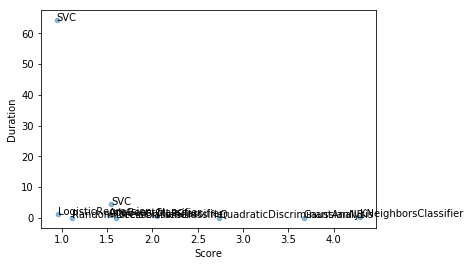

In [0]:
#results.plot.scatter(x='Score', y='Duration')
ax = results.plot.scatter(x='Score', y='Duration', alpha=0.5)
for i, txt in enumerate(results.Classifier):
    ax.annotate(txt, (results.Score.iat[i],results.Duration.iat[i]))

plt.show()


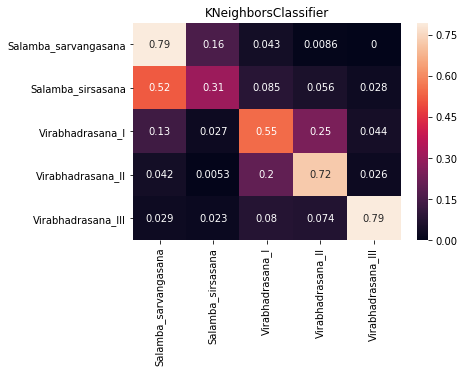

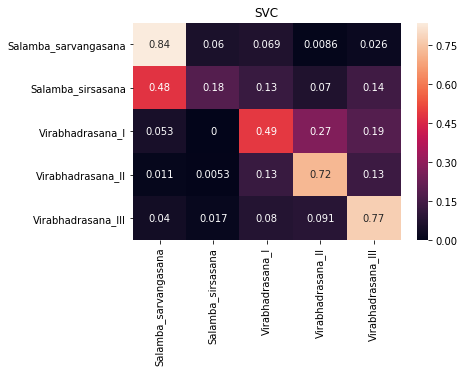

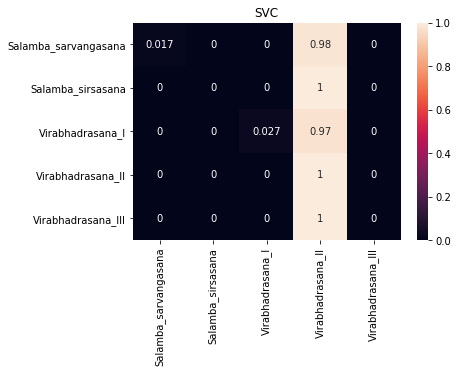

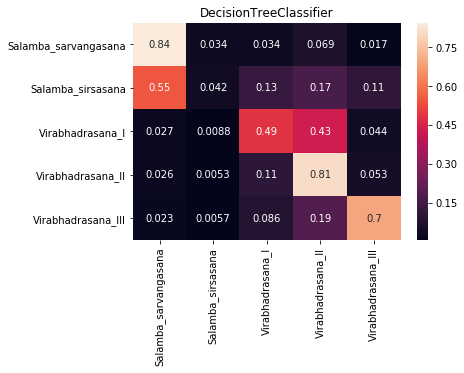

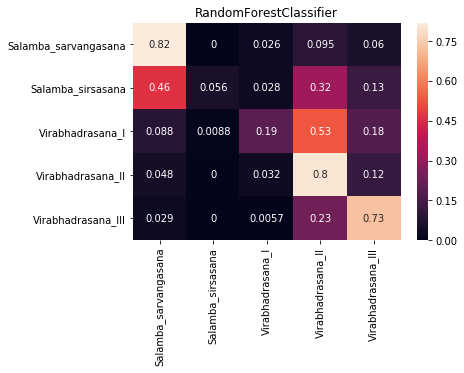

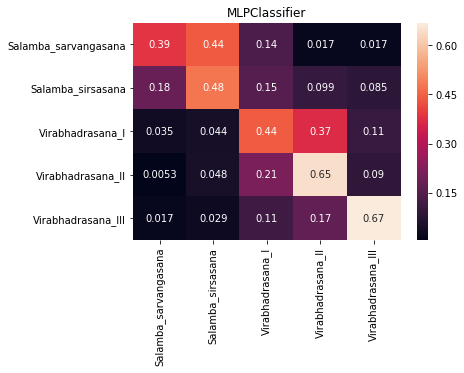

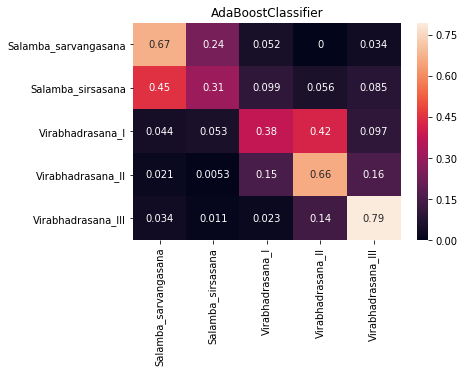

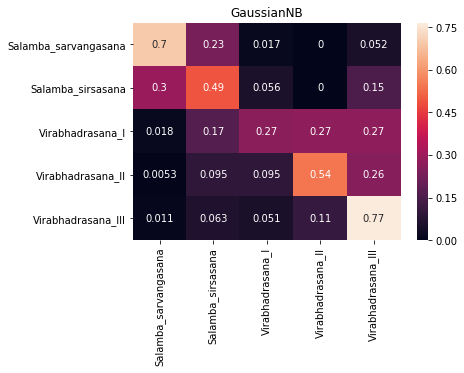

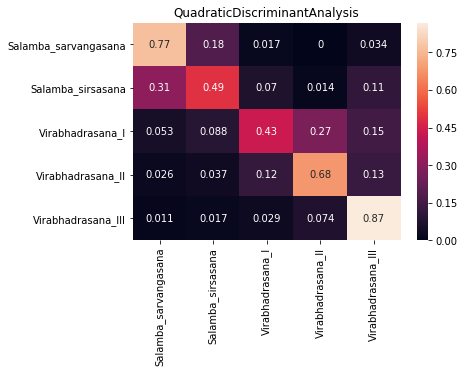

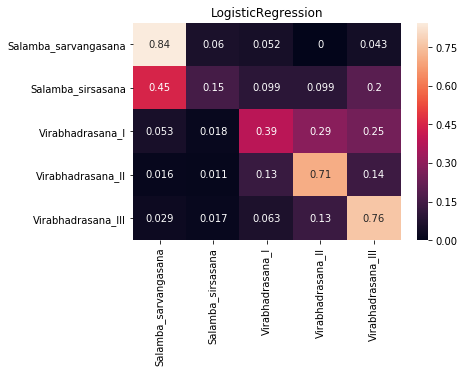

In [0]:
for confmat, classifier_name in zip(confmats, classifier_names):
    plt.figure()
    ax = plt.axes()
    sn.heatmap(pd.DataFrame(confmat, labels, labels), annot=True)
    ax.set_title(classifier_name)

## Try to re-build the model for joint angles rather than joint locaitons
* Get list of joints which have adjacent joints
* Calculate line from joint to joinA, same with jointB
* Calculate angle between the two lines
* angle=np.arccos(np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))

https://stackoverflow.com/questions/39497496/angle-between-two-vectors-3d-python
